**1) Download the Building_Permits.csv from Kaggle**


**2) Clean the San Francisco Building permit dataset**


**3) Use imputation were necessary**



### Import der Daten & Python Pakete

In [303]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [304]:
# get building_permit csv files as a DataFrame

#developmental data (train)
building_df = pd.read_csv("./Building_Permits.csv")

#cross validation data (hold-out testing)
#test_df    = pd.read_csv("./titanic/test.csv")
np.random.seed(0) 
# preview developmental data
building_df.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
40553,201403039652,8,otc alterations permit,03/03/2014,3732,008,400,NaN,Clementina,St,...,NaN,NaN,1.0,constr type 1,NaN,6.0,South of Market,94103.0,"(37.780460571778164, -122.40450626524974)",1334094491645
169731,201510159735,3,additions alterations or repairs,10/15/2015,2609,028,79,NaN,Buena Vista,Tr,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94117.0,"(37.76757916496494, -122.43793170417105)",1399356139170
19180,M409787,8,otc alterations permit,07/22/2013,4624,031,178,NaN,West Point,Rd,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73524725436046, -122.38063828309745)",1311685491725
68047,201411191888,8,otc alterations permit,11/19/2014,0039,109,294,NaN,Francisco,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,North Beach,94133.0,"(37.805257822817126, -122.40998545760392)",1362881288870
64238,M527228,8,otc alterations permit,10/14/2014,1251,002,707,NaN,Cole,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Haight Ashbury,94117.0,"(37.76836885973765, -122.45074431487859)",135886493776


### Datenanalyse - Wie viele Werte fehlen in welcher Spalte?

In [305]:
# Wir lassen uns die % Zahlen ausgeben, wie viel Werte  in einer Spalte fehlen 
missing_values = building_df.isnull().sum()
sums = building_df.isnull().sum()
missing_percent = (sums/building_df.shape[0]).sort_values(ascending=False)
missing_percent

TIDF Compliance                           0.999990
Voluntary Soft-Story Retrofit             0.999824
Unit Suffix                               0.990141
Street Number Suffix                      0.988859
Site Permit                               0.973057
Structural Notification                   0.965199
Fire Only Permit                          0.905344
Unit                                      0.851790
Completed Date                            0.511357
Permit Expiration Date                    0.260835
Existing Units                            0.259115
Proposed Units                            0.255963
Existing Construction Type                0.218029
Existing Construction Type Description    0.218029
Proposed Construction Type                0.217004
Proposed Construction Type Description    0.217004
Number of Proposed Stories                0.215525
Number of Existing Stories                0.215103
Proposed Use                              0.213369
Existing Use                   

In [306]:
#Wie viel % der Daten fehlen insgesamt??


# total number of cells 
total_cells = np.product(building_df.shape)
# total missing values 
missing_values = building_df.isnull().sum()
total_missing_values = missing_values.sum()

# percentage of nan or None cells 
nan_or_null_cell_percentage = (total_missing_values/total_cells)*100
nan_or_null_cell_percentage

26.26002315058403

### Bemerkung

Insgesamt fehlen über 26% der Einträge in den Spalten. 

bei folgenden Spalten (in %) fehlen extrem viele Werte und sind damit ungeinget, falls wir später mit Hilfe dieser Daten etwas vorhersagen möchten: 


* TIDF Compliance                           100.00
* Voluntary Soft-Story Retrofit              99.98
* Unit Suffix                                99.01
* Street Number Suffix                       98.89
* Site Permit                                97.31
* Structural Notification                    96.52
* Fire Only Permit                           90.53
* Unit                                       85.18
* Completed Date                             51.14

### Entschluss - Einfügen Y/N Spalten

Wir haben uns darauf geeinigt, dass wir den Großteil der Spalten ignorieren und bei Voluntary Soft-Story Retrofit, Site Permit und Fire Only Permit bei allen fehlenden Werten ein N (No) eintragen, da dies nur Y/N Spalten sind. Somit füllen wir die "fehlenden" Werte auf und können diese für die Prediction verwenden.

Theoretisch könnte man hier schon für Y eine 1 und für N eine 0 eintragen, wir haben uns dazu entschieden, dass erst bei C zu machen.

In [307]:
#Welche Werte kommen in der Spalte vor?
building_df['Voluntary Soft-Story Retrofit'].value_counts()


Y    35
Name: Voluntary Soft-Story Retrofit, dtype: int64

In [308]:
building_df['Site Permit'].value_counts()


Y    5359
Name: Site Permit, dtype: int64

In [309]:
building_df['Fire Only Permit'].value_counts()

Y    18827
Name: Fire Only Permit, dtype: int64

In [310]:
# Die Spalte besteht nur aus Y oder kein Y, daher fügen wir bei keinem Y einfach ein N hinzu.  
building_df['Voluntary Soft-Story Retrofit'] = np.where(building_df['Voluntary Soft-Story Retrofit']=='Y', 'Y', 'N')
building_df['Site Permit'] = np.where(building_df['Site Permit']=='Y', 'Y', 'N')
building_df['Fire Only Permit'] = np.where(building_df['Fire Only Permit']=='Y', 'Y', 'N')

In [311]:
# hat geklappt
building_df['Fire Only Permit'].value_counts()

N    180073
Y     18827
Name: Fire Only Permit, dtype: int64

### Ergebnis

Wie man sieht, fehlen jetzt keine Werte mehr in den oben behandelten Spalten: 

In [312]:
sums = building_df.isnull().sum()
missing_percent = (sums/building_df.shape[0]).sort_values(ascending=False)
missing_percent

TIDF Compliance                           0.999990
Unit Suffix                               0.990141
Street Number Suffix                      0.988859
Structural Notification                   0.965199
Unit                                      0.851790
Completed Date                            0.511357
Permit Expiration Date                    0.260835
Existing Units                            0.259115
Proposed Units                            0.255963
Existing Construction Type Description    0.218029
Existing Construction Type                0.218029
Proposed Construction Type                0.217004
Proposed Construction Type Description    0.217004
Number of Proposed Stories                0.215525
Number of Existing Stories                0.215103
Proposed Use                              0.213369
Existing Use                              0.206707
Estimated Cost                            0.191383
Plansets                                  0.187577
First Construction Document Dat

Als nächsten werden folgende restlichen Spalten behandelt:

* TIDF Compliance                           100.00
* Unit Suffix                                99.01
* Street Number Suffix                       98.89
* Structural Notification                    96.52
* Unit                                       85.18
* Completed Date                             51.14

### Ignorieren der Spalten mit vielen fehlenden Werten

Da eine rekonstruktion bzw. Imputation zu aufwändig ist bzw. dafür auch zu viele Daten fehlen ( >50%) werden wir die oben aufgezählten Spalten ignorieren. Nach unsrerem Verständnis ergbit es auch keine Sinn, dass wir anhand von bspw. der Street Number Suffix etwas vorhersagen und außerdem wäre es hier zu aufwändig im Verhältnis zum Nutzen

In [313]:
def drop_column(column_name):
    building_df.drop(column_name, axis=1, inplace=True)
for i in range(len(missing_percent)):
    if ( missing_percent[i] > 0.5):
        drop_column(missing_percent.index[i])
    else:
        break

Wie wir sehen können, wurden die entsprechenden Spalten gelöscht.

In [314]:
sums = building_df.isnull().sum()
missing_percent = (sums/building_df.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Date                    0.260835
Existing Units                            0.259115
Proposed Units                            0.255963
Existing Construction Type Description    0.218029
Existing Construction Type                0.218029
Proposed Construction Type Description    0.217004
Proposed Construction Type                0.217004
Number of Proposed Stories                0.215525
Number of Existing Stories                0.215103
Proposed Use                              0.213369
Existing Use                              0.206707
Estimated Cost                            0.191383
Plansets                                  0.187577
First Construction Document Date          0.075143
Issued Date                               0.075113
Revised Cost                              0.030498
Street Suffix                             0.013917
Neighborhoods - Analysis Boundaries       0.008673
Supervisor District                       0.008632
Zipcode                        

Nach der Behandlung der Daten fehlen nur noch knapp 8,4 % der Daten

In [315]:
# total number of cells 
total_cells = np.product(building_df.shape)
# total missing values 
missing_values = building_df.isnull().sum()
total_missing_values = missing_values.sum()

# percentage of nan or None cells 
nan_or_null_cell_percentage = (total_missing_values/total_cells)*100
nan_or_null_cell_percentage

8.39526857173916

### Beschreibenden Spalten ignorieren

Nachdem wir die Spalten mit den meistfehlenden Einträgen behandelt haben, schauen wir uns den restlichen Datensatz an. Wir können hier erkennen, dass es einige Spalten gibt, die andere wiederum  beschreiben.

Permit Type - Permit Type Definition

Wir haben uns entschieden, die Spalte rauszuschmeißen, welche eine numerische Spalte beschreibt -- Also Permit Type Definition z.B

In [316]:
unuseful_columns = ['Record ID', 'Description', 'Permit Type Definition', 'Existing Construction Type Description', 'Proposed Construction Type Description']
building_df.drop(unuseful_columns, axis=1, inplace=True)


In [317]:
sums = building_df.isnull().sum()
missing_percent = (sums/building_df.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Date                 0.260835
Existing Units                         0.259115
Proposed Units                         0.255963
Existing Construction Type             0.218029
Proposed Construction Type             0.217004
Number of Proposed Stories             0.215525
Number of Existing Stories             0.215103
Proposed Use                           0.213369
Existing Use                           0.206707
Estimated Cost                         0.191383
Plansets                               0.187577
First Construction Document Date       0.075143
Issued Date                            0.075113
Revised Cost                           0.030498
Street Suffix                          0.013917
Neighborhoods - Analysis Boundaries    0.008673
Supervisor District                    0.008632
Zipcode                                0.008627
Location                               0.008547
Permit Creation Date                   0.000000
Street Name                            0

### Logischer Zusammenhang zw. Proposed Spalten und Existing Spalten

Wir haben uns den Datensatz mal genauer angeschaut und fest gestellt, dass bei vielen Tupeln, die Einträge bei Proposed Spalten und Existing Spalten identisch sind (immer über ca. 75%). Die Zahlen sollten nicht zu unterschiedlich sein es könnte möglich sein, dass die'Existing'-Spalten für Baugenehmigungen wichtiger sind. 



In [318]:
(building_df['Existing Use'] == building_df['Proposed Use']).sum() / len(building_df['Proposed Use'])

0.7422976370035194

In [319]:
(building_df['Existing Construction Type'] == building_df['Proposed Construction Type']).sum() / len(building_df['Proposed Construction Type'])

0.7635796882855707

In [320]:
(building_df['Revised Cost'] == building_df['Revised Cost']).sum() / len(building_df['Estimated Cost'])

0.969502262443439

In [321]:
(building_df['Number of Existing Stories'] == building_df['Number of Proposed Stories']).sum() / len(building_df['Number of Proposed Stories'])

0.7525641025641026

In [322]:
(building_df['Existing Construction Type'] == building_df['Proposed Construction Type']).sum() / len(building_df['Proposed Construction Type'])

0.7635796882855707

Alternativ könnte man entweder  die Einträge mit den fehlenden Werten löschen und hätte somit aber nur noch knapp 80% der Daten oder den Median eintragen.

Wir haben uns dazu entschieden, die Werte aus den Proposed (und Revised) Spalten in die Estimated Spalten zu übernehmen


In [323]:
building_df['Existing Use'].fillna(building_df['Proposed Use'], inplace=True)
building_df['Revised Cost'].fillna(building_df['Estimated Cost'], inplace=True)
building_df['Existing Units'].fillna(building_df['Proposed Units'], inplace=True)
building_df['Number of Existing Stories'].fillna(building_df['Number of Proposed Stories'], inplace=True)
building_df['Existing Construction Type'].fillna(building_df['Proposed Construction Type'], inplace=True)

In [324]:
sums = building_df.isnull().sum()
missing_percent = (sums/building_df.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Date                 0.260835
Proposed Units                         0.255963
Existing Units                         0.243957
Proposed Construction Type             0.217004
Number of Proposed Stories             0.215525
Proposed Use                           0.213369
Existing Construction Type             0.199211
Number of Existing Stories             0.197959
Existing Use                           0.195093
Estimated Cost                         0.191383
Plansets                               0.187577
First Construction Document Date       0.075143
Issued Date                            0.075113
Street Suffix                          0.013917
Neighborhoods - Analysis Boundaries    0.008673
Supervisor District                    0.008632
Zipcode                                0.008627
Location                               0.008547
Revised Cost                           0.003042
Permit Creation Date                   0.000000
Street Name                            0

### Datum anpassen, neue Spaltenaufteilung und alte Datumspalten entfernen

da die Daten in der jeweiligen spalte auch in verschiedenen Formaten existieren, haben wir uns dazu entschieden, die Spalten aufzubrechen in einzelne Tag, Monat und Jahre Spalte und die ursprüngliche Spalte zu entfernen 

In [325]:
date_columns = [
    'Permit Creation Date',
    'Current Status Date',
    'Filed Date',
    'Issued Date',
    'First Construction Document Date',
    'Permit Expiration Date'
]

In [326]:
def split_dates(column_name):
    name = column_name[0:-4]
    building_df[name+'Year'] = building_df[column_name].astype(str).str[-4:]
    building_df[name+'Year'] = pd.to_numeric(building_df[name+'Year'], errors='coerce')
    building_df[name+'Day'] = building_df[column_name].astype(str).str[3:5]
    building_df[name+'Day'] = pd.to_numeric(building_df[name+'Day'], errors='coerce')
    building_df[name+'Month'] = building_df[column_name].astype(str).str[0:2]
    building_df[name+'Month'] = pd.to_numeric(building_df[name+'Month'], errors='coerce')
for i in date_columns:
    split_dates(i)

In [327]:
building_df.columns

Index(['Permit Number', 'Permit Type', 'Permit Creation Date', 'Block', 'Lot',
       'Street Number', 'Street Name', 'Street Suffix', 'Current Status',
       'Current Status Date', 'Filed Date', 'Issued Date',
       'First Construction Document Date', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Voluntary Soft-Story Retrofit',
       'Fire Only Permit', 'Permit Expiration Date', 'Estimated Cost',
       'Revised Cost', 'Existing Use', 'Existing Units', 'Proposed Use',
       'Proposed Units', 'Plansets', 'Existing Construction Type',
       'Proposed Construction Type', 'Site Permit', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Permit Creation Year', 'Permit Creation Day', 'Permit Creation Month',
       'Current Status Year', 'Current Status Day', 'Current Status Month',
       'Filed Year', 'Filed Day', 'Filed Month', 'Issued Year', 'Issued Day',
       'Issued Month', 'First Construction Document Year'

In [328]:
for i in date_columns:
    drop_column(i)

In [329]:
building_df.columns

Index(['Permit Number', 'Permit Type', 'Block', 'Lot', 'Street Number',
       'Street Name', 'Street Suffix', 'Current Status',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Estimated Cost',
       'Revised Cost', 'Existing Use', 'Existing Units', 'Proposed Use',
       'Proposed Units', 'Plansets', 'Existing Construction Type',
       'Proposed Construction Type', 'Site Permit', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Permit Creation Year', 'Permit Creation Day', 'Permit Creation Month',
       'Current Status Year', 'Current Status Day', 'Current Status Month',
       'Filed Year', 'Filed Day', 'Filed Month', 'Issued Year', 'Issued Day',
       'Issued Month', 'First Construction Document Year',
       'First Construction Document Day', 'First Construction Document Month',
       'Permit Expiration Year', 'Permit Expiration Day',
       'Permi

In [330]:
sums = building_df.isnull().sum()
missing_percent = (sums/building_df.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Month                0.260835
Permit Expiration Year                 0.260835
Permit Expiration Day                  0.260835
Proposed Units                         0.255963
Existing Units                         0.243957
Proposed Construction Type             0.217004
Number of Proposed Stories             0.215525
Proposed Use                           0.213369
Existing Construction Type             0.199211
Number of Existing Stories             0.197959
Existing Use                           0.195093
Estimated Cost                         0.191383
Plansets                               0.187577
First Construction Document Month      0.075143
First Construction Document Day        0.075143
First Construction Document Year       0.075143
Issued Year                            0.075113
Issued Month                           0.075113
Issued Day                             0.075113
Street Suffix                          0.013917
Neighborhoods - Analysis Boundaries    0

### Welche Spalten sind für die Vorhersage (logisch) sinnvoll und welche nicht?

Nachdem wir schon einige Spalten behandelt haben, haben wir uns überlegt, welche Spalten wir in diesem schon gesäuberten Datensatz behalten, und welche wir vor nicht sinnvoll halten. 

Hier eine Übersicht:

* Location - Die Location ist nur ein Geokoordinate, das keinen Nutzen  ohne die Zonen hat (zu komplex für diesen Zweck und die Postleitzahl ist besser dafür).
* Proposed Use - nutzen hier Existing Use
* Estimated Cost  - nutzen hier revised Cost
* Proposed Units - nutzen hier Estimated Unit
* Number of Proposed Stories - nutzen hier Number of Estimated Stories
* Proposed Construction Type - nutzen hier Estimated Construction Type
* Street Number - wir ignorieren die Hausnummer , weil sie kategorisch ist, aber zu viele Kategorien hat und keinen Einfluss auf die Baugenehmigung hat (sollte nicht). 
* Block - tdie Adresse liefert keine guten Daten für Baugenehmigungen und kann nicht verwendet werden. 
* Lot
* **Street Name** - wir haben uns entschieden, den Straßennamen zu behalten, weil es nicht zu viele Werte gibt und alle Zeilen ihn haben.
* Street Suffix -  keinen Einfluss auf die Baugenehmigung hat (sollte nicht). 
* Permit Number - nur eine Zahl, zu viele Kategorien 

In [331]:
len(building_df['Street Name'].unique())

1704

In [332]:
columns_to_drop = ['Location', 
                   'Proposed Use',
                   'Estimated Cost',
                   'Proposed Units',
                   'Number of Proposed Stories',
                   'Proposed Construction Type',
                   'Street Number', 
                   'Block', 
                   'Lot',
                   'Street Suffix',
                   'Permit Number', 

                  
                  ]

In [333]:
for i in columns_to_drop:
    drop_column(i)

In [334]:
building_df.shape

(198900, 33)

In [335]:
sums = building_df.isnull().sum()
missing_percent = (sums/building_df.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Month                0.260835
Permit Expiration Year                 0.260835
Permit Expiration Day                  0.260835
Existing Units                         0.243957
Existing Construction Type             0.199211
Number of Existing Stories             0.197959
Existing Use                           0.195093
Plansets                               0.187577
First Construction Document Year       0.075143
First Construction Document Day        0.075143
First Construction Document Month      0.075143
Issued Month                           0.075113
Issued Day                             0.075113
Issued Year                            0.075113
Neighborhoods - Analysis Boundaries    0.008673
Supervisor District                    0.008632
Zipcode                                0.008627
Revised Cost                           0.003042
Street Name                            0.000000
Current Status                         0.000000
Voluntary Soft-Story Retrofit          0

# Imputations


Damit man später weiß, welche Werte imputiert/nachberechnet wurden. fügen wir für jede Spalte eine zusätzliche Spalte hinzu, deren fehlende Werte anzeigen, ob dieser Wert berechnet wurde oder nicht. 

In [336]:
imputed = building_df.copy()
cols_with_missing = (col for col in building_df.columns 
                                 if building_df[col].isnull().any())
for col in cols_with_missing:
    imputed[col + '_was_missing'] = imputed[col].isnull()
    

In [337]:
imputed.head(5)

,Permit Type,Street Name,Current Status,Number of Existing Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Revised Cost,Existing Use,Existing Units,Plansets,...,Zipcode_was_missing,Issued Year_was_missing,Issued Day_was_missing,Issued Month_was_missing,First Construction Document Year_was_missing,First Construction Document Day_was_missing,First Construction Document Month_was_missing,Permit Expiration Year_was_missing,Permit Expiration Day_was_missing,Permit Expiration Month_was_missing
0,4,Ellis,expired,6.0,N,N,4000.0,tourist hotel/motel,143.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,4,Geary,issued,7.0,N,N,500.0,tourist hotel/motel,NaN,2.0,...,False,False,False,False,False,False,False,False,False,False
2,3,Pacific,withdrawn,6.0,N,N,20000.0,retail sales,39.0,2.0,...,False,True,True,True,True,True,True,True,True,True
3,8,Pacific,complete,2.0,N,N,2000.0,1 family dwelling,1.0,2.0,...,False,False,False,False,False,False,False,False,False,False
4,6,Market,issued,3.0,N,N,100000.0,retail sales,NaN,2.0,...,False,False,False,False,False,False,False,False,False,False


In [338]:
sums = imputed.isnull().sum()
missing_percent = (sums/imputed.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Month                            0.260835
Permit Expiration Year                             0.260835
Permit Expiration Day                              0.260835
Existing Units                                     0.243957
Existing Construction Type                         0.199211
Number of Existing Stories                         0.197959
Existing Use                                       0.195093
Plansets                                           0.187577
First Construction Document Year                   0.075143
First Construction Document Day                    0.075143
First Construction Document Month                  0.075143
Issued Day                                         0.075113
Issued Year                                        0.075113
Issued Month                                       0.075113
Neighborhoods - Analysis Boundaries                0.008673
Supervisor District                                0.008632
Zipcode                                 

In [339]:
# vergelich imputing zu original
building_df.shape


(198900, 33)

In [340]:
imputed.shape

(198900, 51)

Wenn man den Datensatz betrachtet, gibt es ein paar Spalten (z.B Revised Cost,) die Numerisch sind, bei denen wir, wie in der Vorlesung behandelt, den Median imputieren können..

In [341]:
numerical_cols = [
    'Revised Cost',
]

In [345]:
imputed['Revised Cost'].isnull().sum()

0

In [346]:
for column in numerical_cols:
    imputed[column].fillna( imputed[column].mean(skipna=True) , inplace=True)

In [347]:
imputed['Revised Cost'].isnull().sum()

0

In [348]:
sums = imputed.isnull().sum()
missing_percent = (sums/imputed.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Month                            0.260835
Permit Expiration Year                             0.260835
Permit Expiration Day                              0.260835
Existing Units                                     0.243957
Existing Construction Type                         0.199211
Number of Existing Stories                         0.197959
Existing Use                                       0.195093
Plansets                                           0.187577
First Construction Document Year                   0.075143
First Construction Document Day                    0.075143
First Construction Document Month                  0.075143
Issued Day                                         0.075113
Issued Year                                        0.075113
Issued Month                                       0.075113
Neighborhoods - Analysis Boundaries                0.008673
Supervisor District                                0.008632
Zipcode                                 

In [349]:
imputed.columns

Index(['Permit Type', 'Street Name', 'Current Status',
       'Number of Existing Stories', 'Voluntary Soft-Story Retrofit',
       'Fire Only Permit', 'Revised Cost', 'Existing Use', 'Existing Units',
       'Plansets', 'Existing Construction Type', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Permit Creation Year', 'Permit Creation Day', 'Permit Creation Month',
       'Current Status Year', 'Current Status Day', 'Current Status Month',
       'Filed Year', 'Filed Day', 'Filed Month', 'Issued Year', 'Issued Day',
       'Issued Month', 'First Construction Document Year',
       'First Construction Document Day', 'First Construction Document Month',
       'Permit Expiration Year', 'Permit Expiration Day',
       'Permit Expiration Month', 'Number of Existing Stories_was_missing',
       'Revised Cost_was_missing', 'Existing Use_was_missing',
       'Existing Units_was_missing', 'Plansets_was_missing',
       'Existing Construc

Schaut man sich den restlichen Datensatz an, kann man erkennen, dass es sinnvoll ist,  in den noch übrig geblieben Spalten den Modus/häufigsten Wert einzutragen:

In [350]:
sums = imputed.isnull().sum()
missing_percent = (sums/imputed.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Month                            0.260835
Permit Expiration Year                             0.260835
Permit Expiration Day                              0.260835
Existing Units                                     0.243957
Existing Construction Type                         0.199211
Number of Existing Stories                         0.197959
Existing Use                                       0.195093
Plansets                                           0.187577
First Construction Document Year                   0.075143
First Construction Document Day                    0.075143
First Construction Document Month                  0.075143
Issued Day                                         0.075113
Issued Year                                        0.075113
Issued Month                                       0.075113
Neighborhoods - Analysis Boundaries                0.008673
Supervisor District                                0.008632
Zipcode                                 

### Zwei Möglichkeiten

An dieser Stelle gibt es zwei Möglichkeiten.

1) Wir tragen für die fehlenden Werte in Spalten der häufigsten Wert ein

2) Wir löschen die Zeilen mit den fehlenden Werten

Dazu schauen wir uns an, wie viel % der Daten überhaupt noch fehlen:

In [351]:
#Wie viel % der Daten fehlen insgesamt??


# total number of cells 
total_cells = np.product(imputed.shape)
# total missing values 
missing_values = imputed.isnull().sum()
total_missing_values = missing_values.sum()

# percentage of nan or None cells 
nan_or_null_cell_percentage = (total_missing_values/total_cells)*100
nan_or_null_cell_percentage

4.476473545677698

Nach Einblick in den Datensatz, haben wir uns dazu entschieden teilweise die Lösung 1 und teilweise die Lösung zwei zu verweden, da man gerade bei Spalten mit Character einfach den häufigsten Wert eintragen kann. Bei allen Datumspalten haben wir uns entschieden, die Einträge zu löschen. Wie wir gleich sehen, fehlen uns dann nur ein kleiner Prozentteil der Daten

In [352]:
mode = [
    'Existing Construction Type',
    'Existing Units',
    'Existing Use',
    'Plansets',
    'Number of Existing Stories',
]

In [353]:
for column in mode:
    imputed[column].fillna(imputed[column].mode()[0], inplace = True)

In [354]:
#Wie viel % der Daten fehlen insgesamt??


# total number of cells 
total_cells = np.product(imputed.shape)
# total missing values 
missing_values = imputed.isnull().sum()
total_missing_values = missing_values.sum()

# percentage of nan or None cells 
nan_or_null_cell_percentage = (total_missing_values/total_cells)*100
nan_or_null_cell_percentage

2.4690306489614446

In [362]:
sums = imputed.isnull().sum()
missing_percent = (sums/imputed.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Month                            0.260835
Permit Expiration Year                             0.260835
Permit Expiration Day                              0.260835
First Construction Document Year                   0.075143
First Construction Document Day                    0.075143
First Construction Document Month                  0.075143
Issued Day                                         0.075113
Issued Year                                        0.075113
Issued Month                                       0.075113
Neighborhoods - Analysis Boundaries                0.008673
Supervisor District                                0.008632
Zipcode                                            0.008627
Plansets                                           0.000000
Fire Only Permit                                   0.000000
Current Status Year                                0.000000
Street Name                                        0.000000
Permit Creation Month                   

In [355]:
#imputed['Permit Expiration Month'].value_counts()

Am ende löschen wir noch alle Zeilen raus, die keine Werte enthalten. Wir haben uns dazu entschieden, 
da wir nur 2,46% der Daten verlieren. Es wäre ebenfalls möglich gewesen, für alle Spalten mit fehlenden Werten (s.u.) den Häufigsten Wert zu ermitteln und zu imputieren. Da der Aufwand aber aus unsere Sicht nicht den Nutzen hat und der Datenverlust sowieso gering ist, haben wir uns dazu entschieden, die Daten zu löschen.

* Permit Expiration Month                            0.260835
* Permit Expiration Year                             0.260835
* Permit Expiration Day                              0.260835
* First Construction Document Year                   0.075143
* First Construction Document Day                    0.075143
* First Construction Document Month                  0.075143
* Issued Day                                         0.075113
* Issued Year                                        0.075113
* Issued Month                                       0.075113
* Neighborhoods - Analysis Boundaries                0.008673
* Supervisor District                                0.008632
* Zipcode                                            0.008627

In [378]:
#Am ende löschen wir noch alle Zeilen raus, die keine Werte enthalten. Wir haben uns dazu entschieden, 
#da wir nur 2,46% der Daten verlieren. Es wäre ebenfalls möglich gewesen, f
imputed = imputed.dropna()

print("Rows left: %d" % len(imputed))

Rows left: 145904


In [379]:
sums = imputed.isnull().sum()
missing_percent = (sums/imputed.shape[0]).sort_values(ascending=False)
missing_percent

Permit Expiration Month_was_missing                0.0
Supervisor District                                0.0
Filed Day                                          0.0
Filed Year                                         0.0
Current Status Month                               0.0
Current Status Day                                 0.0
Current Status Year                                0.0
Permit Creation Month                              0.0
Permit Creation Day                                0.0
Permit Creation Year                               0.0
Zipcode                                            0.0
Neighborhoods - Analysis Boundaries                0.0
Site Permit                                        0.0
Issued Year                                        0.0
Existing Construction Type                         0.0
Plansets                                           0.0
Existing Units                                     0.0
Existing Use                                       0.0
Revised Co

In [380]:
imputed.head(5)

,Permit Type,Street Name,Current Status,Number of Existing Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Revised Cost,Existing Use,Existing Units,Plansets,...,Zipcode_was_missing,Issued Year_was_missing,Issued Day_was_missing,Issued Month_was_missing,First Construction Document Year_was_missing,First Construction Document Day_was_missing,First Construction Document Month_was_missing,Permit Expiration Year_was_missing,Permit Expiration Day_was_missing,Permit Expiration Month_was_missing
0,4,Ellis,expired,6.0,N,N,4000.0,tourist hotel/motel,143.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,4,Geary,issued,7.0,N,N,500.0,tourist hotel/motel,1.0,2.0,...,False,False,False,False,False,False,False,False,False,False
3,8,Pacific,complete,2.0,N,N,2000.0,1 family dwelling,1.0,2.0,...,False,False,False,False,False,False,False,False,False,False
4,6,Market,issued,3.0,N,N,100000.0,retail sales,1.0,2.0,...,False,False,False,False,False,False,False,False,False,False
5,8,Indiana,issued,5.0,N,Y,4000.0,apartments,326.0,2.0,...,False,False,False,False,False,False,False,False,False,False


### Fazit


Das Bereinigen des San Francisco Buidling Permit Datensatzes war schwieriger als gedacht. Es war zu Beginn sehr schwer den Datensatz zu verstehen und zusammenhänge daraus zu schließen. Erst nach Recherchen und Disskusion konnte man langsam durchsteigen.
Gerade zu bestimmen, welche Spalten für die Vorherrsage wichtig ist und welche nicht, fiel uns extrem schwer! Wir haben uns grundsätzlich immer auf rationale/logische Schritte geeinigt wie z.B. die 50% Hürde bei den fehlenden Daten. 
Dadurch, dass wir nach und nach Spalten entfernt haben, hatten wir gegen Ende auch einen besseren Überblick über den Datensatz

# B SF Permits Exploration

* Explore the data. Which columns correlate strongly with the "Current Status" column? How do other
columns correlate to each other?
* Describe problems with "Current Status" as a target column to predict. Can you construct a better
target column?

* Beschreiben Sie Probleme mit "Aktueller Status" als Zielspalte zur Vorhersage. Kannst du eine bessere Spalte bauen?

Wenn man sich die Spalte Current Status genauer anschaut, sieht man, dass es sehr viel verschiedene String-werte gibt. Das vorherrsagen der Stringwerte kann sehr schwer sein. Daher haben wir uns darauf geeinigt,die Spalte auf 0 (not permitted,in_progress) und 1 (permitted) zu kategorisieren

In [382]:
imputed['Current Status'].value_counts()

complete      96275
issued        46393
expired        1364
cancelled      1188
reinstated      451
suspend         175
revoked          49
approved          7
incomplete        1
withdrawn         1
Name: Current Status, dtype: int64

In [383]:
permitted = [
   'approved', 
    'issued', 
    'complete'
]

in_progress = [
    'appeal', 
    'plancheck', 
    'suspend', 
    'reinstated', 
    'filed'
]

not_permitted = [
    'disapproved',
    'incomplete',
    'revoked',
    'expired',
    'cancelled',
    'withdrawn'
]

In [384]:
for i in permitted:
    imputed['Current Status'].replace(to_replace=i, value='1', inplace=True)

for i in in_progress:
    imputed['Current Status'].replace(to_replace=i, value='0', inplace=True)    

for i in not_permitted:
    imputed['Current Status'].replace(to_replace=i, value='0', inplace=True) 

In [385]:
imputed['Current Status'].value_counts()

1    142675
0      3229
Name: Current Status, dtype: int64

In [386]:
imputed['Current Status'] = pd.to_numeric(imputed['Current Status'])

In [387]:
plt.figure(figsize=(20,4))

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

In [388]:
imputed.describe()

,Permit Type,Current Status,Number of Existing Stories,Revised Cost,Existing Units,Plansets,Existing Construction Type,Supervisor District,Zipcode,Permit Creation Year,...,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
count,145904.000000,145904.000000,145904.000000,1.459040e+05,145904.000000,145904.000000,145904.000000,145904.000000,145904.000000,145904.000000,...,145904.000000,145904.000000,145904.000000,145904.000000,145904.000000,145904.000000,145904.000000,145904.000000,145904.000000,145904.000000
mean,7.570718,0.977869,5.786644,1.587807e+05,15.294223,1.213846,4.066091,5.610189,94115.474058,2015.063864,...,6.415438,2015.152635,15.741371,6.418933,2015.158426,15.720474,6.429803,2016.332650,15.592225,6.124781
std,1.382269,0.147110,8.740825,3.927059e+06,72.945582,23.579649,1.592499,2.867341,9.403604,1.447383,...,3.402507,1.463512,8.690774,3.411150,1.465267,8.700937,3.416976,1.563849,8.804768,3.351608
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,94102.000000,2012.000000,...,1.000000,2013.000000,1.000000,1.000000,2013.000000,1.000000,1.000000,2013.000000,1.000000,1.000000
25%,8.000000,1.000000,2.000000,4.000000e+03,1.000000,0.000000,3.000000,3.000000,94109.000000,2014.000000,...,3.000000,2014.000000,8.000000,3.000000,2014.000000,8.000000,3.000000,2015.000000,8.000000,3.000000
50%,8.000000,1.000000,3.000000,1.200000e+04,1.000000,2.000000,5.000000,6.000000,94114.000000,2015.000000,...,6.000000,2015.000000,16.000000,6.000000,2015.000000,16.000000,6.000000,2016.000000,15.000000,6.000000
75%,8.000000,1.000000,4.000000,4.000000e+04,4.000000,2.000000,5.000000,8.000000,94122.000000,2016.000000,...,9.000000,2016.000000,23.000000,9.000000,2016.000000,23.000000,9.000000,2018.000000,23.000000,9.000000
max,8.000000,1.000000,63.000000,7.805000e+08,1907.000000,9000.000000,5.000000,11.000000,94158.000000,2018.000000,...,12.000000,2018.000000,31.000000,12.000000,2018.000000,31.000000,12.000000,2024.000000,31.000000,12.000000


In [389]:
imputed.columns

Index(['Permit Type', 'Street Name', 'Current Status',
       'Number of Existing Stories', 'Voluntary Soft-Story Retrofit',
       'Fire Only Permit', 'Revised Cost', 'Existing Use', 'Existing Units',
       'Plansets', 'Existing Construction Type', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Permit Creation Year', 'Permit Creation Day', 'Permit Creation Month',
       'Current Status Year', 'Current Status Day', 'Current Status Month',
       'Filed Year', 'Filed Day', 'Filed Month', 'Issued Year', 'Issued Day',
       'Issued Month', 'First Construction Document Year',
       'First Construction Document Day', 'First Construction Document Month',
       'Permit Expiration Year', 'Permit Expiration Day',
       'Permit Expiration Month', 'Number of Existing Stories_was_missing',
       'Revised Cost_was_missing', 'Existing Use_was_missing',
       'Existing Units_was_missing', 'Plansets_was_missing',
       'Existing Construc

### Welche Spalten korrelieren stark mit der Spalte "Current Status"?

**Im folgenden untersuchen wir die Korrelation von einigen Spalten und dem Current Status.**



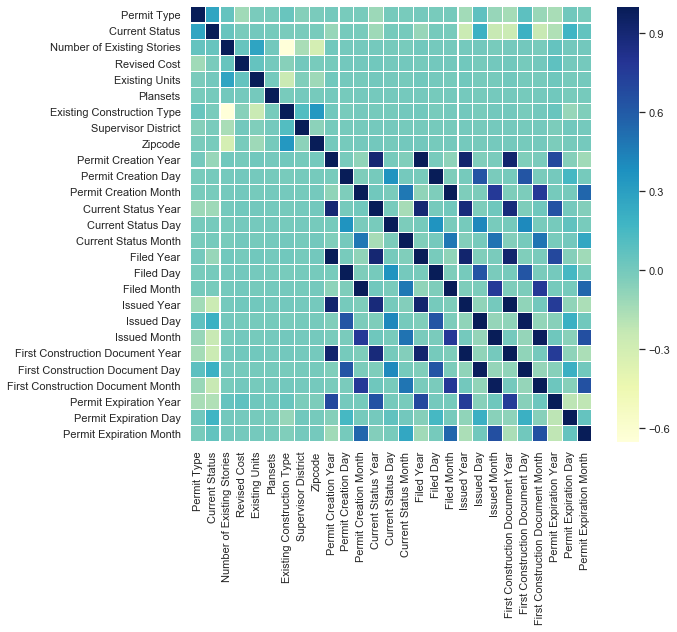

In [428]:
#drop was_missing spalten
df1 = imputed
df1 = df.drop(df.columns[33:],axis=1)
#df1.columns
#corrmat = imputed_scale.corr()

corrmat = df1.corr()
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidth = 0.1)

Wenn es keine Korrelation zwischen 2 Variablen gibt (wenn die Korrelation 0 oder nahe 0 ist), ist die Farbe des Rechtecks in der Heatmap türkis. Das dunkelste Blau bedeutet, dass es eine perfekte positive Korrelation gibt, während das Weiß/Hellgrün bedeutet, dass es eine perfekte negative Korrelation gibt (siehe Legende rechts).
Bei der Auswertung der Korrelation zwischen allen Merkmalen beinhaltet die "corr()"-Methode die Korrelation jedes Merkmals mit sich selbst, die immer 1 ist, weshalb diese Art von Diagramm immer die blaue Diagonale von oben links nach unten rechts aufweist. Abgesehen von der Diagonale zeigen die restlichen Quadrate Korrelationen zwischen verschiedenen Merkmalen, was es sehr einfach macht, festzustellen, dass nur gringe Korrelation zwischen Current Status und den restlichen Spalten gibt. Dazu schaut man einfach in die Current Status Zeile der Heatmap und sieht, dass es nur Permit Type, Issued Day, First Construction Document Day und Permit Expiration Day "Korrelation" gibt. Korrelation steht hier in Anführungszeichen, da diese, wie wir im folgenden sehen, sehr gering ist:

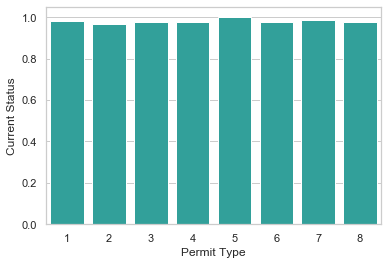

Die Korrelation von Permit Type und Current Status liegt bei: 0.006500023733367129


In [404]:
# Korrelation zwischen Permit Type und Current Status
avg_by_permittype = imputed[['Permit Type','Current Status']].groupby('Permit Type',as_index=False).mean()
sns.barplot(x='Permit Type', y='Current Status', data=avg_by_permittype, color="LightSeaGreen")
plt.show()
corr = imputed['Permit Type'].corr(final_df['Current Status'],method ='pearson')
print("Die Korrelation von Permit Type und Current Status liegt bei: "+ str(corr))

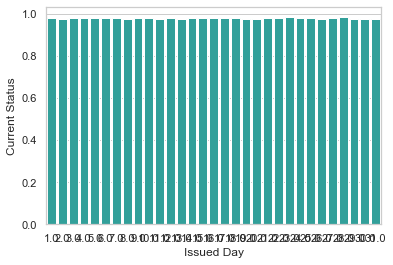

Die Korrelation von Issued Day und Current Status liegt bei: 0.0008624943541626824


In [429]:
# Korrelation zwischen Plansets und Current Status
avg_by_plansets = imputed[['Issued Day','Current Status']].groupby('Issued Day',as_index=False).mean()
sns.barplot(x='Issued Day', y='Current Status', data=avg_by_plansets, color="LightSeaGreen")
plt.show()
corr = imputed['Issued Day'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von Issued Day und Current Status liegt bei: "+ str(corr))

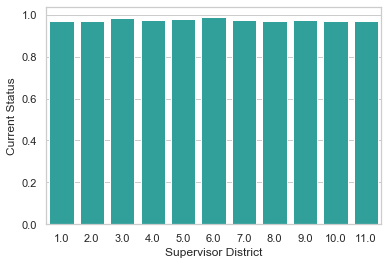

Die Korrelation von Supervisor District und Current Status liegt bei: -0.0053083973583351015


In [406]:
# Korrelation zwischen Supervisor District und Current Status
avg_by_supervisor_dis = imputed[['Supervisor District','Current Status']].groupby('Supervisor District',as_index=False).mean()
sns.barplot(x='Supervisor District', y='Current Status', data=avg_by_supervisor_dis, color="LightSeaGreen")
plt.show()
corr = imputed['Supervisor District'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von Supervisor District und Current Status liegt bei: "+ str(corr))

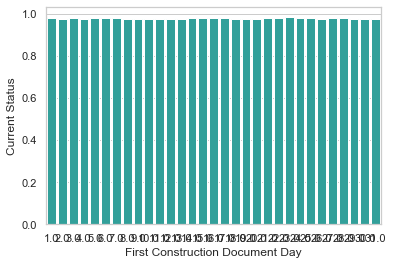

Die Korrelation von First Construction Document Day und Current Status liegt bei: 0.0014318734350005555


In [430]:
# Korrelation zwischen Permit Creation Year und Current Status
avg_by_permit_cre_year = imputed[['First Construction Document Day','Current Status']].groupby('First Construction Document Day',as_index=False).mean()
sns.barplot(x='First Construction Document Day', y='Current Status', data=avg_by_permit_cre_year, color="LightSeaGreen")
plt.show()
corr = imputed['First Construction Document Day'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von First Construction Document Day und Current Status liegt bei: "+ str(corr))


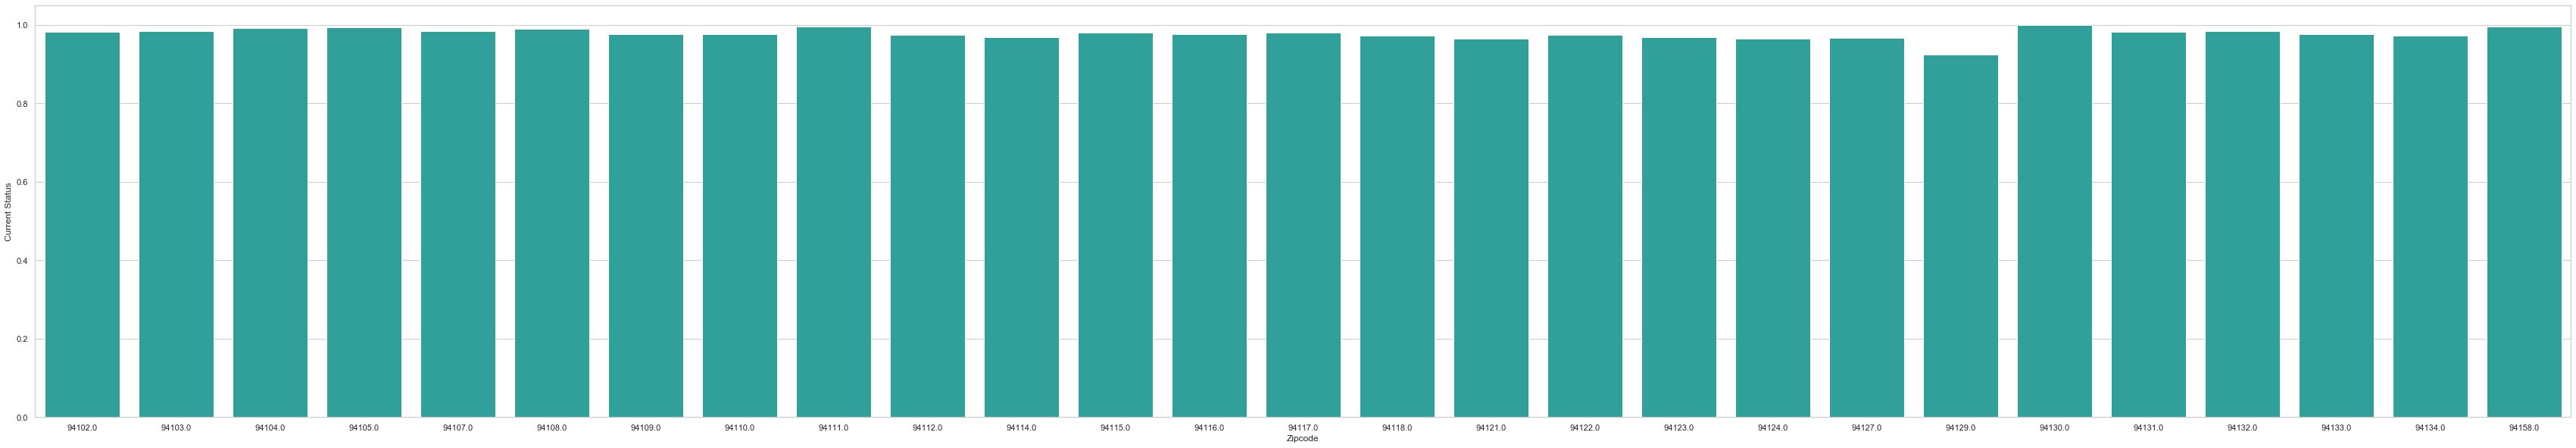

Die Korrelation von Zipcode und Current Status liegt bei: -0.023867107183529728


In [408]:
# Korrelation zwischen Zipcode und Current Status
plt.figure(figsize=(60,10))
avg_by_zipcode = imputed[['Zipcode','Current Status']].groupby('Zipcode',as_index=False).mean()
sns.barplot(x='Zipcode', y='Current Status', data=avg_by_zipcode, color="LightSeaGreen")
plt.show()
corr = imputed['Zipcode'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von Zipcode und Current Status liegt bei: "+ str(corr))


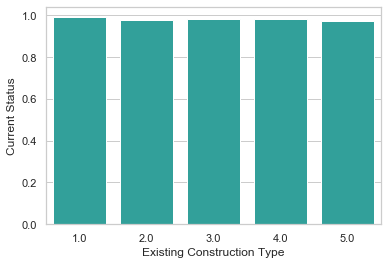

Die Korrelation von Existing Construction Type und Current Status liegt bei: -0.04732417835217785


In [409]:
# Korrelation zwischen Existing Construction Type und Current Status
avg_by_ex_con_tpye = imputed[['Existing Construction Type','Current Status']].groupby('Existing Construction Type',as_index=False).mean()
sns.barplot(x='Existing Construction Type', y='Current Status', data=avg_by_ex_con_tpye, color="LightSeaGreen")
plt.show()
corr = imputed['Existing Construction Type'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von Existing Construction Type und Current Status liegt bei: "+ str(corr))


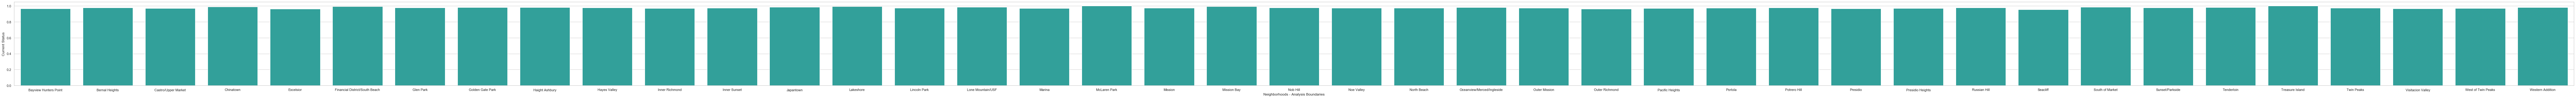

In [410]:
# Korrelation zwischen Neighborhoods - Analysis Boundaries und Current Status
plt.figure(figsize=(150,5))
avg_by_nei_an = imputed[['Neighborhoods - Analysis Boundaries','Current Status']].groupby('Neighborhoods - Analysis Boundaries',as_index=False).mean()
sns.barplot(x='Neighborhoods - Analysis Boundaries', y='Current Status', data=avg_by_nei_an, color="LightSeaGreen")
plt.show()
#corr = int (imputed['Neighborhoods - Analysis Boundaries'].corr(imputed['Current Status'],method ='pearson'))
#print("Die Korrelation von Neighborhoods - Analysis Boundaries und Current Status liegt bei: "+ str(corr))


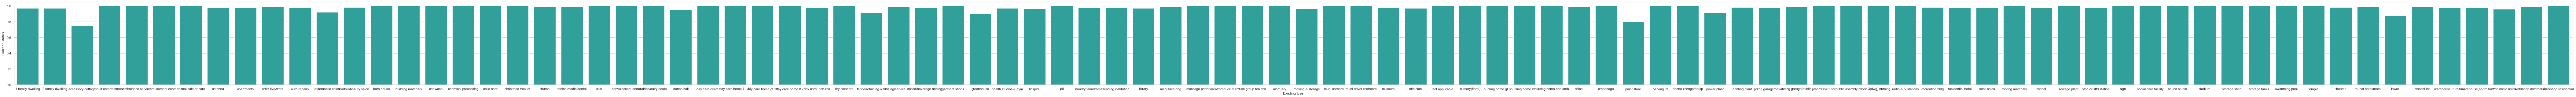

In [411]:
# Korrelation zwischen Existing Use und Current Status
plt.figure(figsize=(150,5))
avg_by_exi_use = imputed[['Existing Use','Current Status']].groupby('Existing Use',as_index=False).mean()
sns.barplot(x='Existing Use', y='Current Status', data=avg_by_exi_use, color="LightSeaGreen")
plt.show()
#corr = imputed['Existing Use'].corr(imputed['Current Status'],method ='pearson')
#rint("Die Korrelation von Existing Use und Current Status liegt bei: "+ str(corr))


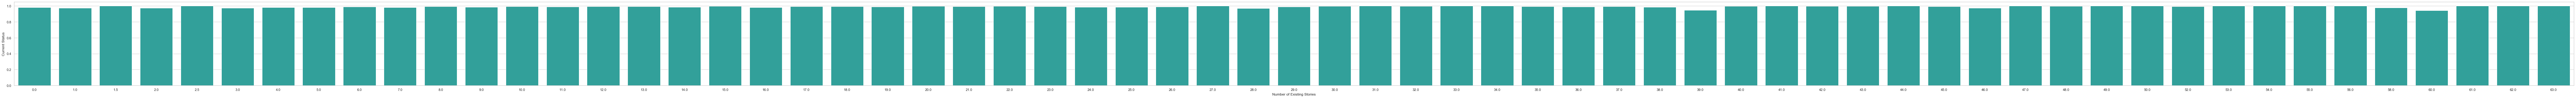

Die Korrelation von Number of Existing Stories und Current Status liegt bei: 0.03711969995499445


In [412]:
# Korrelation zwischen Number of Existing Stories und Current Status
plt.figure(figsize=(150,5))
avg_by_user_stor = imputed[['Number of Existing Stories','Current Status']].groupby('Number of Existing Stories',as_index=False).mean()
sns.barplot(x='Number of Existing Stories', y='Current Status', data=avg_by_user_stor, color="LightSeaGreen")
plt.show()
corr = imputed['Number of Existing Stories'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von Number of Existing Stories und Current Status liegt bei: "+ str(corr))

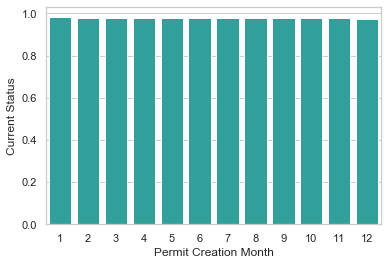

Die Korrelation von Permit Creation Month und Current Status liegt bei: -0.0053602715266814075


In [413]:
# Korrelation zwischen Permit Creation Month und Current Status
avg_by_creat_month = imputed[['Permit Creation Month','Current Status']].groupby('Permit Creation Month',as_index=False).mean()
sns.barplot(x='Permit Creation Month', y='Current Status', data=avg_by_creat_month, color="LightSeaGreen")
plt.show()
corr = imputed['Permit Creation Month'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von Permit Creation Month und Current Status liegt bei: "+ str(corr))

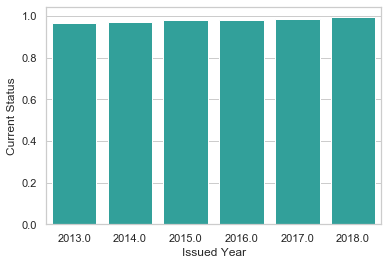

Die Korrelation von Issued Year und Current Status liegt bei: 0.05112156980642698


In [414]:
# Korrelation zwischen issued Year und Current Status
avg_by_i_year = imputed[['Issued Year','Current Status']].groupby('Issued Year',as_index=False).mean()
sns.barplot(x='Issued Year', y='Current Status', data=avg_by_i_year, color="LightSeaGreen")
plt.show()
corr = imputed['Issued Year'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von Issued Year und Current Status liegt bei: "+ str(corr))

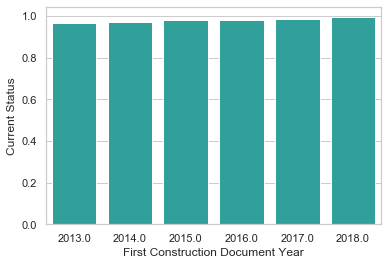

Die Korrelation von First Construction Document Year und Current Status liegt bei: 0.05003332375196711


In [415]:
# Korrelation zwischen First Construction Document Year und Current Status
avg_by_first_cons_year = imputed[['First Construction Document Year','Current Status']].groupby('First Construction Document Year',as_index=False).mean()
sns.barplot(x='First Construction Document Year', y='Current Status', data=avg_by_first_cons_year, color="LightSeaGreen")
plt.show()
corr = imputed['First Construction Document Year'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von First Construction Document Year und Current Status liegt bei: "+ str(corr))

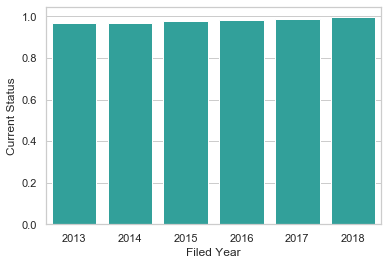

Die Korrelation von Filed Year und Current Status liegt bei: 0.05564657622326574


In [416]:
# Korrelation zwischen Filed Year und Current Status
avg_by_filled_year = imputed[['Filed Year','Current Status']].groupby('Filed Year',as_index=False).mean()
sns.barplot(x='Filed Year', y='Current Status', data=avg_by_filled_year, color="LightSeaGreen")
plt.show()
corr = imputed['Filed Year'].corr(imputed['Current Status'],method ='pearson')
print("Die Korrelation von Filed Year und Current Status liegt bei: "+ str(corr))

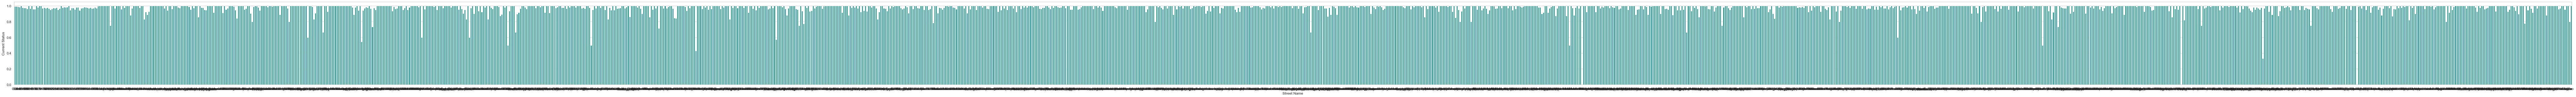

In [417]:
plt.figure(figsize=(150,5))
# Korrelation zwischen Street Name und Current Status
avg_by_street_name = imputed[['Street Name','Current Status']].groupby('Street Name',as_index=False).mean()
sns.barplot(x='Street Name', y='Current Status', data=avg_by_street_name, color="LightSeaGreen")
plt.show()
#corr = imputed['Street Name'].corr(imputed['Current Status'],method ='pearson')
#print("Die Korrelation von Street Name und Current Status liegt bei: "+ str(corr))

#### Antwort:

Zusammenfassend kann man sagen, dass keine Spalte mit Current Status korreliert, zumindest nicht auffallend korreliert! Wenn man etwas hervorheben möchte, dann könnte man behaupten, dass ein paar Spalten gibt, die eine Korrelation im positive Bereich habe. Daraus kann man aber nicht schließen, dass es eine Korrelation gibt. Alles in allem gibt es aber keinen eindeutigen Zusammenhang zwischen der Genehmigung einer Baugenehmigung und den anderen Säulen.

### Wie verhalten sich andere Spalten zueinander?

Zuerst testen wir der Übung wegen ein paar Spalten gegeneinander und berechnen die Korrelation:

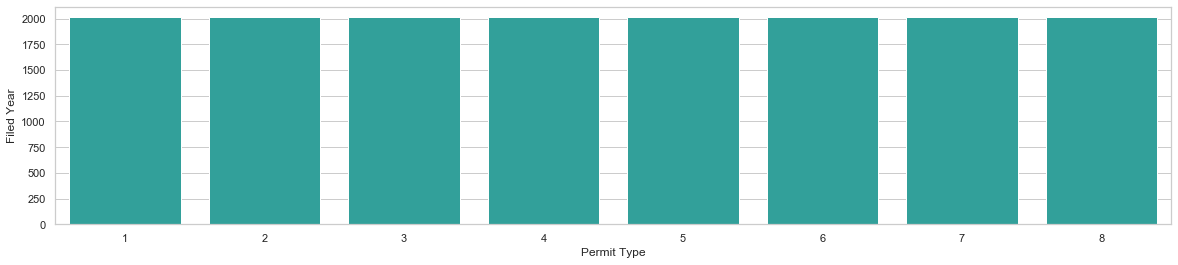

Die Korrelation von Permit Type und Filed Year liegt bei: 0.07168401189799614


In [418]:
plt.figure(figsize=(20,4))
avg_status_by_permittype =imputed[['Permit Type','Filed Year']].groupby('Permit Type',as_index=False).mean()
sns.barplot(x= 'Permit Type', y='Filed Year', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()
corr = imputed['Permit Type'].corr(imputed['Filed Year'],method ='pearson')
print("Die Korrelation von Permit Type und Filed Year liegt bei: "+ str(corr))

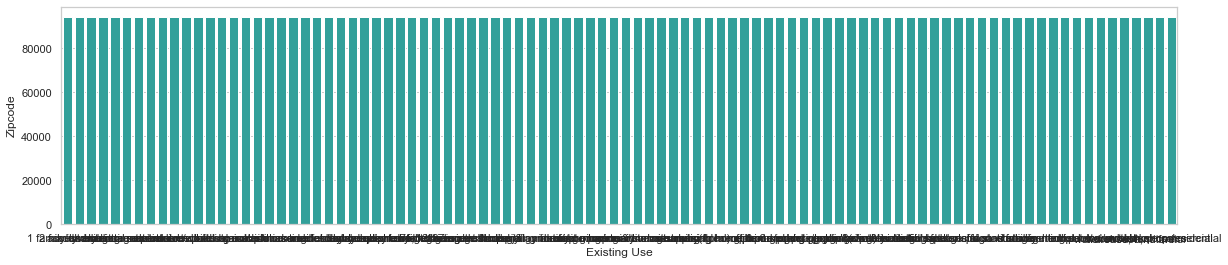

In [419]:
plt.figure(figsize=(20,4))
avg_status_by_permittype =imputed[['Existing Use','Zipcode']].groupby('Existing Use',as_index=False).mean()
sns.barplot(x= 'Existing Use', y='Zipcode', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()
#corr = imputed['Existing Use'].corr(imputed['Zipcode'],method ='pearson')
#print("Die Korrelation von Existing Use und Zipcode liegt bei: "+ str(corr))

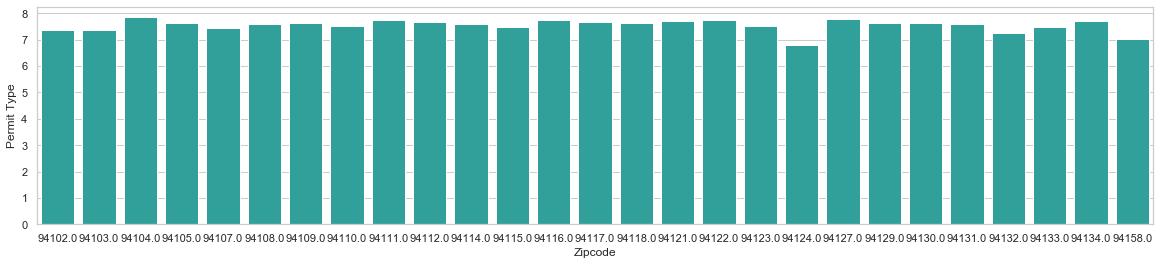

Die Korrelation von Zipcode und Permit Type liegt bei: -0.010074295555796682


In [420]:
plt.figure(figsize=(20,4))
avg_status_by_permittype =imputed[['Zipcode','Permit Type']].groupby('Zipcode',as_index=False).mean()
sns.barplot(x= 'Zipcode', y='Permit Type', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()
corr = imputed['Zipcode'].corr(imputed['Permit Type'],method ='pearson')
print("Die Korrelation von Zipcode und Permit Type liegt bei: "+ str(corr))

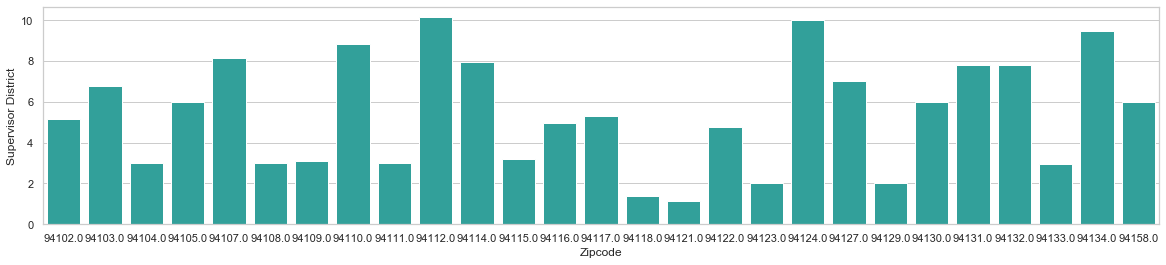

Die Korrelation von Zipcode und Supervisor District liegt bei: -0.04070859876119919


In [421]:
plt.figure(figsize=(20,4))
avg_status_by_permittype =imputed[['Zipcode','Supervisor District']].groupby('Zipcode',as_index=False).mean()
sns.barplot(x= 'Zipcode', y='Supervisor District', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()
corr = imputed['Zipcode'].corr(imputed['Supervisor District'],method ='pearson')
print("Die Korrelation von Zipcode und Supervisor District liegt bei: "+ str(corr))

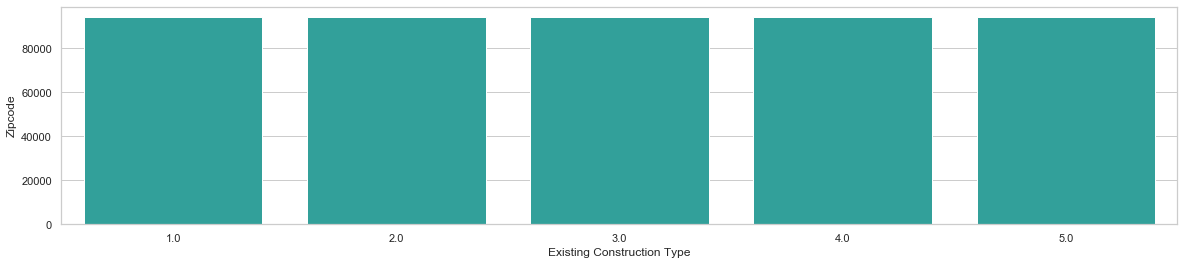

Die Korrelation von Existing Construction Typeund Zipcode liegt bei: 0.3873507706405941


In [422]:
plt.figure(figsize=(20,4))
avg_status_by_permittype =imputed[['Existing Construction Type','Zipcode']].groupby('Existing Construction Type',as_index=False).mean()
sns.barplot(x= 'Existing Construction Type', y='Zipcode', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()
corr = imputed['Existing Construction Type'].corr(imputed['Zipcode'],method ='pearson')
print("Die Korrelation von Existing Construction Typeund Zipcode liegt bei: "+ str(corr))

**Wie verhalten sich die Spalten im Bezug auf die Korrelation?**

Hier eine Heatmap:

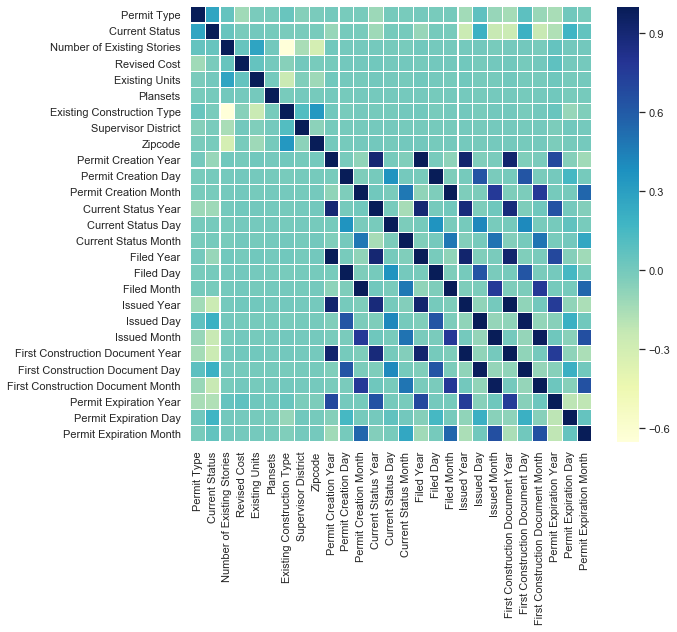

In [427]:
corrmat = df1.corr()
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidth = 0.1)

Wenn wir alle Spalten miteinader vergleichen, muss man quasi jedes Rechteckt (außer die Diagonale). Hier fällt uns schnell auf, dass auf der Rechten unteren Seite viele blau gefärbte Rechtecke gibt. Das liegt logischwerweiße daran, dass es sich hier um die Datumfelder handelt, die einen Zusammenhang haben. Wir können logischerweiße daraufschließen, dass es in der Behörde Fristen gibt, die sich in der Datumkorrelation wiederspiegelt.

Es ist aber auch interessant, dass es auch 2 weiße Felder gibt, was eine fast perfekte (nahe -1) negative Korrelation zeigt

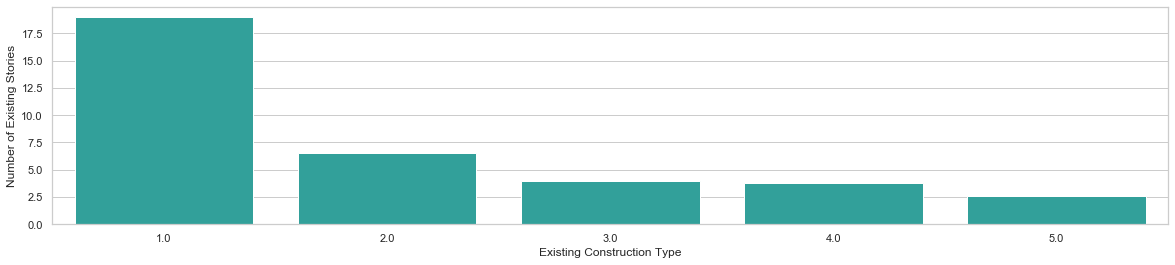

Die Korrelation von Existing Construction Type und Number of Existing Stories liegt bei: -0.6826560042551433


In [432]:
plt.figure(figsize=(20,4))
avg_status_by_permittype =imputed[['Existing Construction Type','Number of Existing Stories']].groupby('Existing Construction Type',as_index=False).mean()
sns.barplot(x= 'Existing Construction Type', y='Number of Existing Stories', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()
corr = imputed['Existing Construction Type'].corr(imputed['Number of Existing Stories'],method ='pearson')
print("Die Korrelation von Existing Construction Type und Number of Existing Stories liegt bei: "+ str(corr))

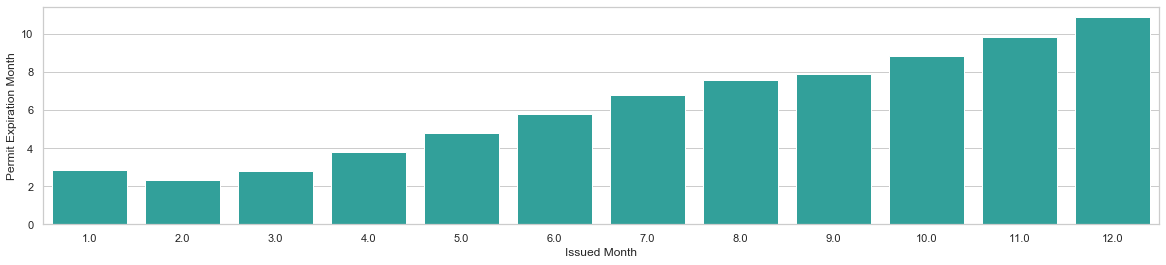

Die Korrelation von Issued Month und Permit Expiration Month liegt bei: 0.8069462050237929


In [433]:
plt.figure(figsize=(20,4))
avg_status_by_permittype =imputed[['Issued Month','Permit Expiration Month']].groupby('Issued Month',as_index=False).mean()
sns.barplot(x= 'Issued Month', y='Permit Expiration Month', data=avg_status_by_permittype, color="LightSeaGreen")
plt.show()
corr = imputed['Issued Month'].corr(imputed['Permit Expiration Month'],method ='pearson')
print("Die Korrelation von Issued Month und Permit Expiration Month liegt bei: "+ str(corr))